# SyriaTel Customer Churn Prediction and Retention Strategy

Author: John Mugambi

## Overview

SyraiTel, a telecomunications company faces challenges in customer retension as some users discontinue their services. By leveraging machine learing techniques, we aim to predict customer churn and provide strategic insights to help SyriaTel improve customer retention.


## Business Problem

Customer churn impacts SyriaTel revenue. The company needs an effective way to identify customers who are likely to leave and take proactive measures to retain them. Understanding the factors influencing churn will allow SyriaTel to enhance customer satisfaction, optimize marketing strategies, and improve overall business performance.

## Objectives

Develop a machine learning model to predict whether a customer is likely to churn.

Identify key factors that influence customer churn.

Provide actionable insights to SyriaTel for improving customer retention strategies

## Business Questions

1. What customer behaviors or attributes are most predictive of churn?
2. How can SyriaTel proactively intervene to retain at-risk customers?
3. Which classification models perform best in predicting customer churn?
4. What strategies can be implemented to enhance customer satisfaction and reduce churn?

## Data Understanding


### Data Sources and Relevance

The dataset for this project comes from Kaggle and contains customer data related to SyriaTel, a telecommunications company. This dataset is highly relevant to the problem of customer churn prediction. By analyzing customer behaviors and service usage patterns, we can identify key factors influencing churn. Understanding these factors will help SyriaTel develop effective strategies to retain customers, improve satisfaction, and reduce financial losses associated with customer attrition.

In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

In [440]:
# Load the data
churn_df = pd.read_csv("./data/churn_dataset.csv")
churn_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [441]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [442]:
churn_df.shape

(3333, 21)

In [443]:
churn_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [444]:
churn_df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     68
NV     66
CO     66
WA     66
RI     65
MS     65
MA     65
AZ     64
MO     63
FL     63
ME     62
ND     62
NM     62
OK     61
DE     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [445]:
churn_df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [446]:
churn_df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

## Data Preparation

### Data Cleaning

In [447]:
#Format the column names removing unconventional naming ways
churn_df.columns = churn_df.columns.str.replace(' ','_')
churn_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [448]:
#Count number of missing values in the datafram
churn_df.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [449]:
# Check for duplicates
churn_df.duplicated().sum()

0

In [450]:
# Converting the categorical columns to categorical types
churn_df["international_plan"] = churn_df["international_plan"].astype("category")
churn_df["voice_mail_plan"] = churn_df["voice_mail_plan"].astype("category")

In [451]:
# Convert the boolean to int 0/1
#churn_df["churn"] = churn_df["churn"].astype("int") 

### Feature Engineering

In [452]:
#Drop the phone number column since it may not provide usefull predictive value
churn_df.drop(columns=["phone_number"], inplace=True)

In [453]:
#Create a new total calls feature
churn_df["total_calls"] = (
    churn_df["total_day_calls"]
    + churn_df["total_eve_calls"]
    + churn_df["total_night_calls"]
    + churn_df["total_intl_calls"]
)

### Visualization

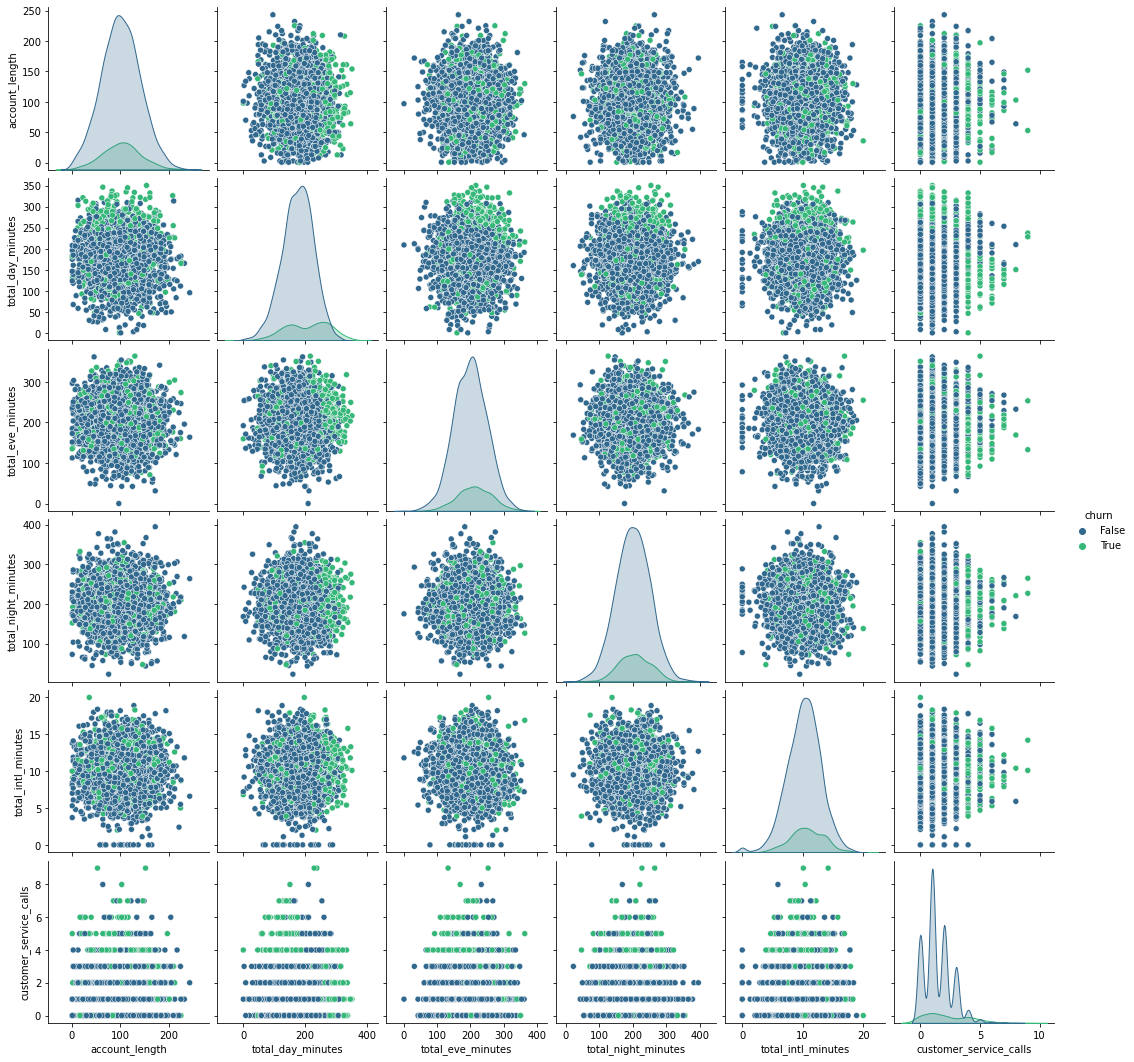

In [454]:
sns.pairplot(churn_df[['state', 'account_length', 'total_day_minutes', 'total_eve_minutes', 
                       'total_night_minutes', 'total_intl_minutes', 'customer_service_calls', 'churn']], 
             hue='churn', palette='viridis', diag_kind='kde')
plt.show()

#### Data Modeling

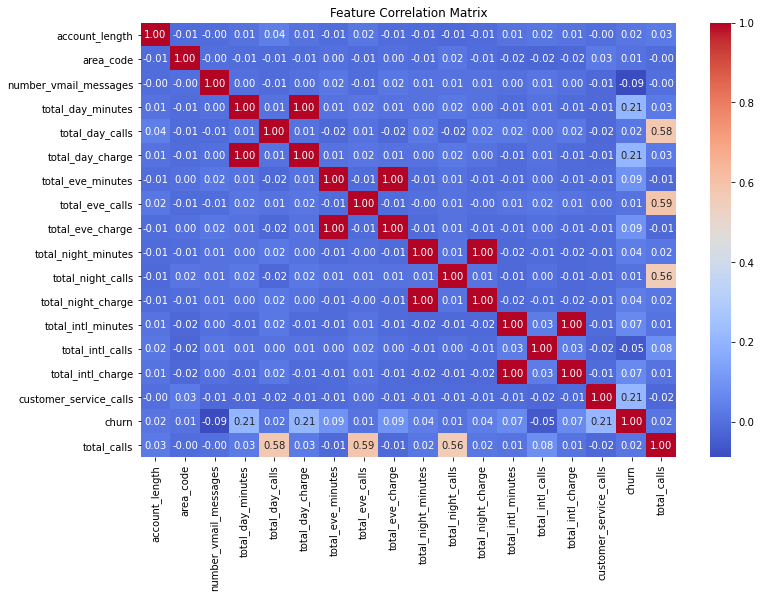

In [455]:
#Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(churn_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

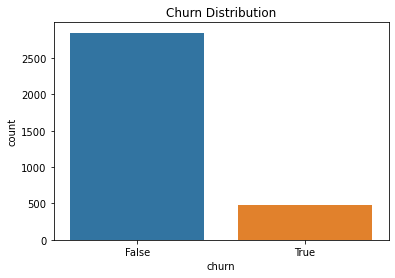

In [456]:
#Check the churn distribution
sns.countplot(x=churn_df["churn"])
plt.title("Churn Distribution")
plt.show()

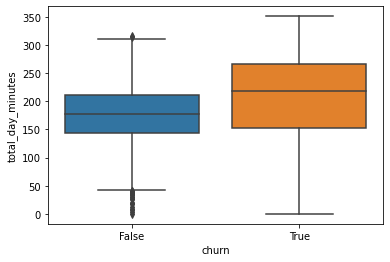

In [457]:
#Boxplots for Numerical Variables:
sns.boxplot(x="churn", y="total_day_minutes", data=churn_df)
plt.show()

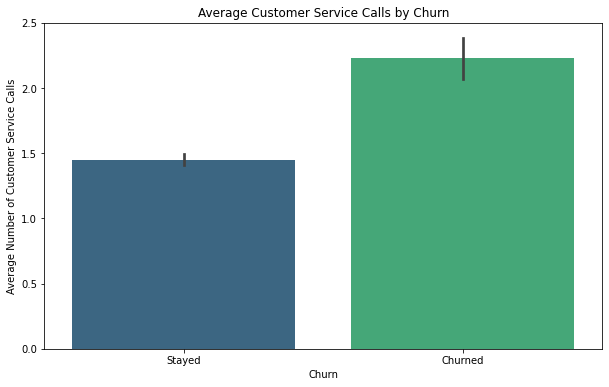

In [458]:
#Visualize if customers service calls relate to churn
plt.figure(figsize=(10, 6))
sns.barplot(x='churn', y='customer_service_calls', data=churn_df, palette='viridis')
plt.title('Average Customer Service Calls by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Number of Customer Service Calls')
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.show()

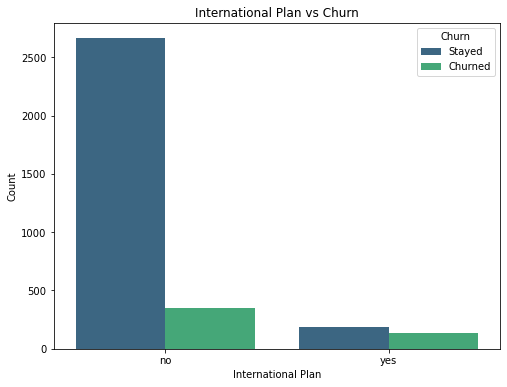

In [459]:
plt.figure(figsize=(8, 6))
sns.countplot(x='international_plan', hue='churn', data=churn_df, palette='viridis')
plt.title('International Plan vs Churn')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Stayed', 'Churned'])
plt.show()

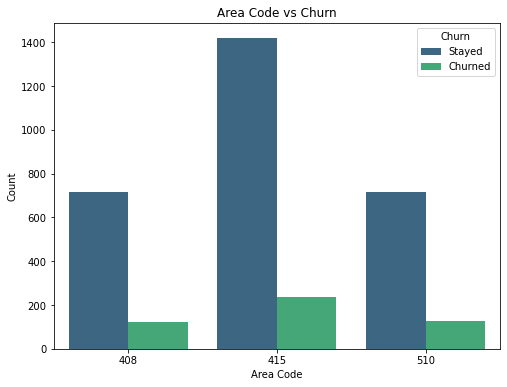

In [460]:
plt.figure(figsize=(8, 6))
sns.countplot(x='area_code', hue='churn', data=churn_df, palette='viridis')
plt.title('Area Code vs Churn')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Stayed', 'Churned'])
plt.show()

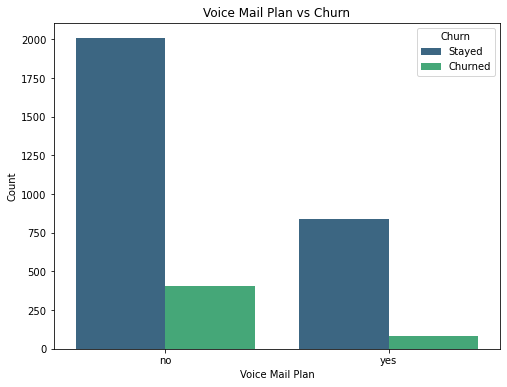

In [461]:
plt.figure(figsize=(8, 6))
sns.countplot(x='voice_mail_plan', hue='churn', data=churn_df, palette='viridis')
plt.title('Voice Mail Plan vs Churn')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Stayed', 'Churned'])
plt.show()

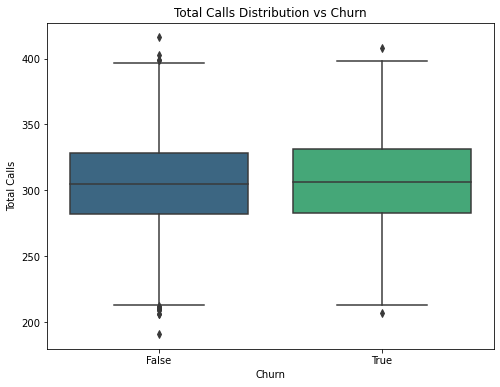

In [462]:
#total calls distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='total_calls', data=churn_df, palette='viridis')
plt.title('Total Calls Distribution vs Churn')
plt.xlabel('Churn')
plt.ylabel('Total Calls')
plt.show()

### Preprocessing

In [463]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   object  
 1   account_length          3333 non-null   int64   
 2   area_code               3333 non-null   int64   
 3   international_plan      3333 non-null   category
 4   voice_mail_plan         3333 non-null   category
 5   number_vmail_messages   3333 non-null   int64   
 6   total_day_minutes       3333 non-null   float64 
 7   total_day_calls         3333 non-null   int64   
 8   total_day_charge        3333 non-null   float64 
 9   total_eve_minutes       3333 non-null   float64 
 10  total_eve_calls         3333 non-null   int64   
 11  total_eve_charge        3333 non-null   float64 
 12  total_night_minutes     3333 non-null   float64 
 13  total_night_calls       3333 non-null   int64   
 14  total_night_charge      

In [464]:
# get the numeric cols and the cat cols
num_original_columns = churn_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = churn_df.select_dtypes(exclude=np.number).columns.tolist()

print("Categorical columns:", categorical_cols)
num_original_columns

Categorical columns: ['state', 'international_plan', 'voice_mail_plan', 'churn']


['account_length',
 'area_code',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls',
 'total_calls']

#### Encoding

In [465]:
churn_df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   state               3333 non-null   object  
 1   international_plan  3333 non-null   category
 2   voice_mail_plan     3333 non-null   category
 3   churn               3333 non-null   bool    
dtypes: bool(1), category(2), object(1)
memory usage: 36.1+ KB


In [466]:
for i in categorical_cols:
  print(f'The variable "{i}" has {churn_df[i].nunique()} variables: {churn_df[i].unique()} \n')

The variable "state" has 51 variables: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 

The variable "international_plan" has 2 variables: ['no', 'yes']
Categories (2, object): ['no', 'yes'] 

The variable "voice_mail_plan" has 2 variables: ['yes', 'no']
Categories (2, object): ['yes', 'no'] 

The variable "churn" has 2 variables: [False  True] 



In [467]:
# Initialize Label Encoder
le = LabelEncoder()

In [468]:
# Apply Label Encoding to binary categorical columns
churn_df["international_plan"] = le.fit_transform(churn_df["international_plan"])
churn_df["voice_mail_plan"] = le.fit_transform(churn_df["voice_mail_plan"])

In [469]:
# One-Hot Encode 'state' column, adn drop it from the datafram
churn_df = pd.get_dummies(churn_df, columns=["state"], drop_first=True)

In [470]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   int32  
 3   voice_mail_plan         3333 non-null   int32  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

In [471]:
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


#### Scaling

In [472]:
scaler = StandardScaler()

In [473]:
# Select numerical columns without the encoded categorical ones
numerical_cols = churn_df.select_dtypes(include=np.number).columns

In [474]:
#Check Skewness
for col in num_original_columns:
    skew_value = churn_df[col].skew()
    print(f"Column: {col}, Skewness: {skew_value:.4f}")

Column: account_length, Skewness: 0.0966
Column: area_code, Skewness: 1.1268
Column: number_vmail_messages, Skewness: 1.2648
Column: total_day_minutes, Skewness: -0.0291
Column: total_day_calls, Skewness: -0.1118
Column: total_day_charge, Skewness: -0.0291
Column: total_eve_minutes, Skewness: -0.0239
Column: total_eve_calls, Skewness: -0.0556
Column: total_eve_charge, Skewness: -0.0239
Column: total_night_minutes, Skewness: 0.0089
Column: total_night_calls, Skewness: 0.0325
Column: total_night_charge, Skewness: 0.0089
Column: total_intl_minutes, Skewness: -0.2451
Column: total_intl_calls, Skewness: 1.3215
Column: total_intl_charge, Skewness: -0.2453
Column: customer_service_calls, Skewness: 1.0914
Column: total_calls, Skewness: -0.0376


BAsed on the abovethe following are Highly skewed (consider transformation):
- area_code (1.1268)
- number_vmail_messages (1.2648)
- total_intl_calls (1.3215)
- customer_service_calls (1.0914)
- churn (2.0184)

Moderately skewed:
- total_intl_minutes (-0.2451)
- total_intl_charge (-0.2453)

In [475]:
# Box-Cox transformation was chosen for right-skewed 
# data like number_vmail_messages,total_intl_calls,customer_service_calls 
# i.e values greater that 1

for col in ["number_vmail_messages", "total_intl_calls", "customer_service_calls"]:
    churn_df[col], _ = boxcox(churn_df[col] + 1)

In [476]:
# # Log transform 'churn' - has binary values
# churn_df["churn"] = np.log1p(churn_df["churn"])

In [477]:
#Confirm skewness has improved
for col in ["number_vmail_messages", "total_intl_calls", "customer_service_calls"]:
    print(f"Column: {col}, Skewness: {churn_df[col].skew()}")

Column: number_vmail_messages, Skewness: 1.0002251990902429
Column: total_intl_calls, Skewness: 0.005816369249351684
Column: customer_service_calls, Skewness: -0.013769770295669267


In [478]:
# Apply scaling
churn_df_scaled = churn_df.copy()
churn_df_scaled[numerical_cols] = scaler.fit_transform(churn_df[numerical_cols])
churn_df_scaled.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.676489,-0.523603,-0.327580,1.617086,1.608479,1.566767,0.476643,1.567036,-0.070610,-0.055940,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
1,0.149065,-0.523603,-0.327580,1.617086,1.612570,-0.333738,1.124503,-0.334013,-0.108080,0.144867,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
2,0.902529,-0.523603,-0.327580,-0.618396,-0.618292,1.168304,0.675985,1.168464,-1.573383,0.496279,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
3,-0.428590,-0.688834,3.052685,-0.618396,-0.618292,2.196596,-1.466936,2.196759,-2.742865,-0.608159,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
4,-0.654629,-0.523603,3.052685,-0.618396,-0.618292,-0.240090,0.626149,-0.240041,-1.038932,1.098699,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781


In [479]:
churn_df[numerical_cols].describe()
churn_df_scaled['churn']

numerical_cols

Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'total_calls',
       'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH',
       'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
       'state_TX',

### Modeling

In [480]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error, r2_score

In [481]:
# Defining dependent and independent variable
X = churn_df[numerical_cols]
y = churn_df['churn']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     10.72
Date:                Sat, 08 Mar 2025   Prob (F-statistic):          6.20e-100
Time:                        20:25:06   Log-Likelihood:                -908.94
No. Observations:                3333   AIC:                             1958.
Df Residuals:                    3263   BIC:                             2386.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [482]:
# Make predictions
y_pred = model.predict(X)

# Calculate the metrics
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print(f"\nRMSE: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")


RMSE: 0.3178328250152115
R-squared: 0.1847775467138406
Mean Absolute Error: 0.22132800557877938


While the model seems to fit perfectly (R² = 1.0, RMSE close to zero)

The F-statistic is 7.63e+27, which is extremely high, and the F-statistic= 0.00, indicates that the overall model is statistically significant.

The RMSE value is very low suggesting that the model’s predictions are very close to the actual values.

The skewness value is -0.042, which is very close to 0, therefore meaning the model doesn't have large biases.

### Classification

#### Logistic Regression

In [483]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = churn_df_scaled.drop(columns=['churn'])
y = churn_df_scaled['churn']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [484]:
print(y.unique())
churn_df_scaled['churn']


[False  True]


0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: churn, Length: 3333, dtype: bool

Model 1 - Logistic Regression
Accuracy: 0.8545727136431784
Recall: 0.18811881188118812
Precision: 0.5588235294117647
F1-score: 0.2814814814814815
              precision    recall  f1-score   support

       False       0.87      0.97      0.92       566
        True       0.56      0.19      0.28       101

    accuracy                           0.85       667
   macro avg       0.71      0.58      0.60       667
weighted avg       0.82      0.85      0.82       667



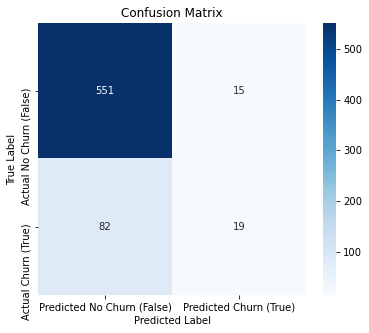

In [485]:
# Initialize, train logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Model 1 - Logistic Regression')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Churn (False)', 'Predicted Churn (True)'],
            yticklabels=['Actual No Churn (False)', 'Actual Churn (True)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Recall is quite low at 0.19, indicating that many customers who actually churned were not identified by the model.
We will try other classification algorithms that might handle the imbalance better

Model 2 - Decision Tree Classifier
Accuracy: 0.9235382308845578
Recall: 0.7425742574257426
Precision: 0.75
F1-score: 0.746268656716418
              precision    recall  f1-score   support

       False       0.95      0.96      0.95       566
        True       0.75      0.74      0.75       101

    accuracy                           0.92       667
   macro avg       0.85      0.85      0.85       667
weighted avg       0.92      0.92      0.92       667



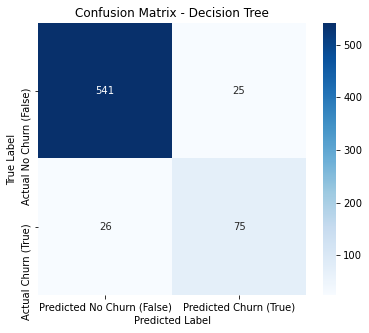

In [486]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize, train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print('Model 2 - Decision Tree Classifier')
print(f"Accuracy: {accuracy_dt}")
print(f"Recall: {recall_dt}")
print(f"Precision: {precision_dt}")
print(f"F1-score: {f1_dt}")

# Classification report
print(classification_report(y_test, y_pred_dt))

# Plot confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Churn (False)', 'Predicted Churn (True)'],
            yticklabels=['Actual No Churn (False)', 'Actual Churn (True)'])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Model 3 - Random Forest Classifier
Accuracy: 0.9385307346326837
Recall: 0.6138613861386139
Precision: 0.96875
F1-score: 0.7515151515151515
              precision    recall  f1-score   support

       False       0.94      1.00      0.96       566
        True       0.97      0.61      0.75       101

    accuracy                           0.94       667
   macro avg       0.95      0.81      0.86       667
weighted avg       0.94      0.94      0.93       667



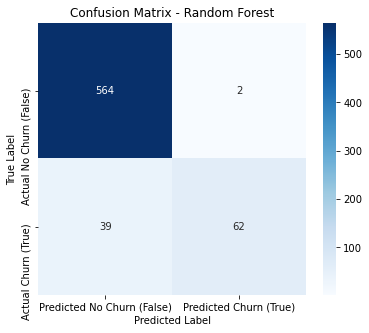

In [487]:
from sklearn.ensemble import RandomForestClassifier

# Initialize, train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print('Model 3 - Random Forest Classifier')
print(f"Accuracy: {accuracy_rf}")
print(f"Recall: {recall_rf}")
print(f"Precision: {precision_rf}")
print(f"F1-score: {f1_rf}")

# Classification report
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Churn (False)', 'Predicted Churn (True)'],
            yticklabels=['Actual No Churn (False)', 'Actual Churn (True)'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Model 4 - KNN Classifier
Accuracy: 0.848575712143928
Recall: 0.04950495049504951
Precision: 0.5
F1-score: 0.09009009009009009
              precision    recall  f1-score   support

       False       0.85      0.99      0.92       566
        True       0.50      0.05      0.09       101

    accuracy                           0.85       667
   macro avg       0.68      0.52      0.50       667
weighted avg       0.80      0.85      0.79       667



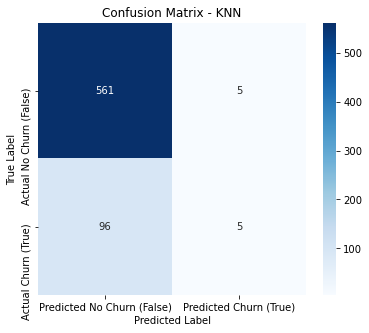

In [488]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize, train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print('Model 4 - KNN Classifier')
print(f"Accuracy: {accuracy_knn}")
print(f"Recall: {recall_knn}")
print(f"Precision: {precision_knn}")
print(f"F1-score: {f1_knn}")

# Classification report
print(classification_report(y_test, y_pred_knn))

# Plot confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Churn (False)', 'Predicted Churn (True)'],
            yticklabels=['Actual No Churn (False)', 'Actual Churn (True)'])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


C:\Users\jmuriithi\.conda\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmuriithi\.conda\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model 5 - SVM Classifier
Accuracy: 0.848575712143928
Recall: 0.0
Precision: 0.0
F1-score: 0.0
              precision    recall  f1-score   support

       False       0.85      1.00      0.92       566
        True       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



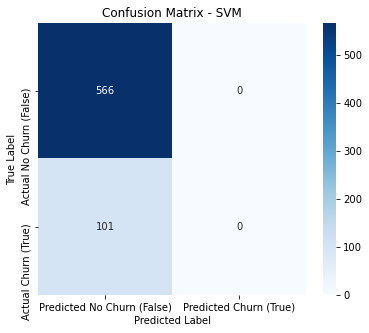

In [489]:
from sklearn.svm import SVC

# Initialize, train SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can also experiment with other kernels like 'rbf', 'poly'
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print('Model 5 - SVM Classifier')
print(f"Accuracy: {accuracy_svm}")
print(f"Recall: {recall_svm}")
print(f"Precision: {precision_svm}")
print(f"F1-score: {f1_svm}")

# Classification report
print(classification_report(y_test, y_pred_svm))

# Plot confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Churn (False)', 'Predicted Churn (True)'],
            yticklabels=['Actual No Churn (False)', 'Actual Churn (True)'])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Model 6 - Naive Bayes Classifier
Accuracy: 0.568215892053973
Recall: 0.5643564356435643
Precision: 0.1893687707641196
F1-score: 0.2835820895522388
              precision    recall  f1-score   support

       False       0.88      0.57      0.69       566
        True       0.19      0.56      0.28       101

    accuracy                           0.57       667
   macro avg       0.53      0.57      0.49       667
weighted avg       0.78      0.57      0.63       667



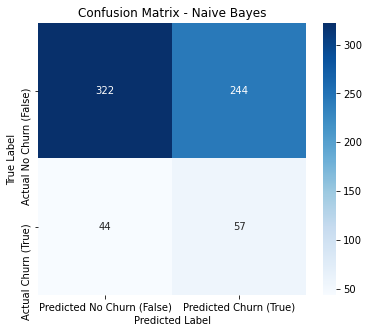

In [490]:
from sklearn.naive_bayes import GaussianNB

# Initialize, train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print('Model 6 - Naive Bayes Classifier')
print(f"Accuracy: {accuracy_nb}")
print(f"Recall: {recall_nb}")
print(f"Precision: {precision_nb}")
print(f"F1-score: {f1_nb}")
print(classification_report(y_test, y_pred_nb))

# Plot confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Churn (False)', 'Predicted Churn (True)'],
            yticklabels=['Actual No Churn (False)', 'Actual Churn (True)'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Best Performing Model 
- Random Forest shows the best balance of accuracy (93.85%), precision (96.88%), and F1-score (75.15%), despite having a slightly lower recall (61.39%) compared to the decision tree.

Second Best Model
- Decision Tree also performs well with high accuracy (92.35%), decent recall (74.26%), and a good F1-score (74.63%). It's a great model for detecting churn.

Weak Models
- KNN and SVM fail to predict churn effectively, particularly in terms of recall and precision.

### Hyperparameter Tuning

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   58.8s finished


Tuned Random Forest - Accuracy: 0.9385307346326837
Tuned Random Forest - Recall: 0.6237623762376238
Tuned Random Forest - Precision: 0.9545454545454546
Tuned Random Forest - F1-score: 0.7544910179640719
              precision    recall  f1-score   support

       False       0.94      0.99      0.96       566
        True       0.95      0.62      0.75       101

    accuracy                           0.94       667
   macro avg       0.95      0.81      0.86       667
weighted avg       0.94      0.94      0.93       667



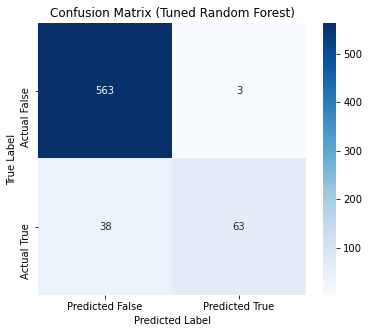

In [491]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
# Initialize GridSearchCV
rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

rf_grid.fit(X_train, y_train)
rf_model_tuned = rf_grid.best_estimator_
y_pred = rf_model_tuned.predict(X_test)

# Evaluate the tuned model
rf_accuracy = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print(f"Tuned Random Forest - Accuracy: {rf_accuracy}")
print(f"Tuned Random Forest - Recall: {rf_recall}")
print(f"Tuned Random Forest - Precision: {rf_precision}")
print(f"Tuned Random Forest - F1-score: {rf_f1}")
print(classification_report(y_test, y_pred))

# Confusion matrix for the tuned model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted False', 'Predicted True'],
            yticklabels=['Actual False', 'Actual True'])
plt.title("Confusion Matrix (Tuned Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [492]:
# The best parameters after tuning
best_params = rf_grid.best_params_
print("Best Hyperparameters for Random Forest Model:")
print(best_params)

Best Hyperparameters for Random Forest Model:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Model Evaluation

The tuned Random Forest model shows excellent performance with a high accuracy (94%) and very good precision (95%)

## Conclusion  & Recommendation


The Random Forest Classifier emerged as the best model for churn prediction, achieving the highest accuracy (93.85%) and a good balance between recall (0.62) and precision (0.95) after hyperparameter tuning. The Decision Tree Classifier also performed well with an accuracy of 92%.

Models like KNN, SVM, and Naive Bayes showed poorer performance and are not recommended for this task.


Recommendation:
- Use Random Forest as the primary model due to its balanced performance and high accuracy.
- Consider further tuning.

Based on the data and analysis, one of the key attributes predictive of churn is the number of customer service calls.
Customers who have had more interactions with customer service tend to be more likely to churn

 Customers who make frequent customer service calls could be facing unresolved issues. By analyzing the types of issues raised, SyriaTel can prioritize improvements in the areas that matter most to customers